In [1]:
# importing all the neccessary dependencies for calculations and evaluation of 6 specified models
# importing all the learning classifiers following six (6) algorithms:
# 1. a single decision tree (DT)
# 2. a random forest (RF) learner
# 3. a support vector machine (SVM)
# 4. a grae
# 5. a multi-layer perceptron (MLP)
# 6. a k‐nearest neighbour (k-NN) classifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# confusion metric and accuracy score evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
# Precision and recall
from sklearn.metrics import classification_report
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## Functions for training all 6 models on both the datasets which take X_train and Y_train for both datasets individually

#### Function to train a single Decision Tree (DT)

In [2]:
# criterion parameter has value entropy which is measurement of impurities in the information processed in machine learning
def decisionTree(X_train, y_train):
    classifier = DecisionTreeClassifier(criterion="entropy")
    classifier.fit(X_train,y_train)
    return classifier

#### Function to train a Random Forest classifier 

In [3]:
# n_estimators specify the number of decision trees in the random forest classifier 
def randomForest(X_train, y_train):
    clf = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
    clf.fit(X_train,y_train)
    return clf

#### Function to train a Support Vector Machine

In [4]:
# used linear kernel in Support vector machine
def SVM(X_train, y_train):
    classifier = SVC(kernel="linear",random_state=0)
    classifier.fit(X_train,y_train)
    return classifier 

#### Function to train a Gradient Boosting classifier

In [5]:
def gradientBoosting(X_train, y_train):
    classifier = GradientBoostingClassifier()
    classifier.fit(X_train,y_train)
    return classifier 

#### Function to train a Multi layer perceptron 

In [6]:
def mlpClassifier(X_train, y_train):
    classifier = MLPClassifier(max_iter=1500)
    classifier.fit(X_train,y_train)
    return classifier

#### Function to train a K-NN classifier

In [7]:
# n_neighbors specify the number of nearest neighbors and p specifies the Euclidean distance
def KNN(X_train, y_train):
    classifier = KNeighborsClassifier(n_neighbors=5,p=2,metric="minkowski")
    classifier.fit(X_train,y_train)
    return classifier

#### Funciton to compute the confusion matrix

In [8]:
# y_test represents the actual target variables 
# y_pred specifies the predicted target values
def matrixCalc(y_test, y_pred):
    metric = confusion_matrix(y_test,y_pred)
    print(metric)

#### Function to calculate precision and recall classification report 

In [9]:
def classificationReport(y_test, y_pred):
    print(classification_report(y_test, y_pred))

# Dataset with label mushrooms

#### Importing the dataset with target label = "mushrooms" and droping the "unnamed: 0" columns and specifying the number of rows and columns

In [10]:
df_mush = pd.read_csv("/Users/bhavneetsingh/Desktop/ML Assignment/ML_assignment-1_mushrooms.csv")
df_mush.drop(["Unnamed: 0"], inplace = True, axis = 1)
df_mush.shape

(1885, 13)

In [11]:
df_mush.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss,mushrooms
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,non-user
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,non-user
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,non-user
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,non-user
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,user


#### Seperating the features and the target variables

In [12]:
X_mush = df_mush.iloc[:,:-1].values
y_mush = df_mush.iloc[:,-1:].values

#### Splitting the dataset into test set and training set

In [13]:
X_train_mush,X_test_mush,y_train_mush,y_test_mush = train_test_split(X_mush,y_mush,test_size=0.2,random_state=0)

## Decision tree classifier 

In [14]:
# training the model on musholate data
tree =  decisionTree(X_train_mush, y_train_mush)

In [15]:
# predicting the test results 
y_pred_mush_decision_tree = tree.predict(X_test_mush)
np.concatenate((y_test_mush.reshape(y_test_mush.size,1),y_pred_mush_decision_tree.reshape(y_test_mush.size,1)),axis=1)

array([['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'user'],
       ['non-user', 'user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'user'],
       ['user', 'user'],
       ['non-user', 'user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'user'],
       ['non-user', 'user'],
       ['non-user', 'user'],
       ['user', 'user'],
       ['user', 'non-user'],
       ['non-user', 'user'],
       ['u

In [17]:
# Accuracy score and confusion matrix 
matrixCalc(y_test_mush,y_pred_mush_decision_tree)

[[176  78]
 [ 54  69]]


In [19]:
accuracy = accuracy_score(y_test_mush,y_pred_mush_decision_tree)
print(f"Accuracy is: {round(accuracy*100, 2)}%")

Accuracy is: 64.99%


In [20]:
# precision and recall
classificationReport(y_test_mush,y_pred_mush_decision_tree)

              precision    recall  f1-score   support

    non-user       0.77      0.69      0.73       254
        user       0.47      0.56      0.51       123

    accuracy                           0.65       377
   macro avg       0.62      0.63      0.62       377
weighted avg       0.67      0.65      0.66       377



## Random Forest classifier

In [21]:
# training the model on musholate data
forest =  randomForest(X_train_mush, y_train_mush.ravel())

In [22]:
# predicting the test results 
y_pred_mush_forest = forest.predict(X_test_mush)
np.concatenate((y_test_mush.reshape(y_test_mush.size,1),y_pred_mush_forest.reshape(y_test_mush.size,1)),axis=1)

array([['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'user'],
       ['non-user', 'user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user',

In [23]:
# Accuracy score and confusion matrix 
matrixCalc(y_test_mush,y_pred_mush_forest)

[[209  45]
 [ 45  78]]


In [24]:
accuracy = accuracy_score(y_test_mush,y_pred_mush_forest)
print(f"Accuracy is: {round(accuracy*100, 2)}%")

Accuracy is: 76.13%


In [25]:
# precision and recall
classificationReport(y_test_mush,y_pred_mush_forest)

              precision    recall  f1-score   support

    non-user       0.82      0.82      0.82       254
        user       0.63      0.63      0.63       123

    accuracy                           0.76       377
   macro avg       0.73      0.73      0.73       377
weighted avg       0.76      0.76      0.76       377



## Support Vector Machine 

In [26]:
# training the model on musholate data
svm =  SVM(X_train_mush, y_train_mush.ravel())

In [27]:
# predicting the test results 
y_pred_mush_svm = svm.predict(X_test_mush)
np.concatenate((y_test_mush.reshape(y_test_mush.size,1),y_pred_mush_svm.reshape(y_test_mush.size,1)),axis=1)

array([['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user',

In [28]:
# Accuracy score and confusion matrix 
matrixCalc(y_test_mush,y_pred_mush_svm)

[[207  47]
 [ 38  85]]


In [29]:
accuracy = accuracy_score(y_test_mush,y_pred_mush_svm)
print(f"Accuracy is: {round(accuracy*100, 2)}%")

Accuracy is: 77.45%


In [30]:
# precision and recall
classificationReport(y_test_mush,y_pred_mush_svm)

              precision    recall  f1-score   support

    non-user       0.84      0.81      0.83       254
        user       0.64      0.69      0.67       123

    accuracy                           0.77       377
   macro avg       0.74      0.75      0.75       377
weighted avg       0.78      0.77      0.78       377



## Gradient Boosting ensemble

In [31]:
# training the model on musholate data
boost =  gradientBoosting(X_train_mush, y_train_mush.ravel())

In [32]:
# predicting the test results 
y_pred_mush_boost = boost.predict(X_test_mush)
np.concatenate((y_test_mush.reshape(y_test_mush.size,1),y_pred_mush_boost.reshape(y_test_mush.size,1)),axis=1)

array([['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user',

In [33]:
# Accuracy score and confusion matrix 
matrixCalc(y_test_mush,y_pred_mush_boost)

[[213  41]
 [ 40  83]]


In [34]:
accuracy = accuracy_score(y_test_mush,y_pred_mush_boost)
print(f"Accuracy is: {round(accuracy*100, 2)}%")

Accuracy is: 78.51%


In [35]:
# precision and recall
classificationReport(y_test_mush,y_pred_mush_boost)

              precision    recall  f1-score   support

    non-user       0.84      0.84      0.84       254
        user       0.67      0.67      0.67       123

    accuracy                           0.79       377
   macro avg       0.76      0.76      0.76       377
weighted avg       0.79      0.79      0.79       377



## Multilayer Perceptron 

In [36]:
# training the model on musholate data
mlp =  mlpClassifier(X_train_mush, y_train_mush.ravel())

In [37]:
# predicting the test results 
y_pred_mush_mlp = mlp.predict(X_test_mush)
np.concatenate((y_test_mush.reshape(y_test_mush.size,1),y_pred_mush_mlp.reshape(y_test_mush.size,1)),axis=1)

array([['non-user', 'user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'user'],
       ['user', 'user'],
       ['user', 'non-user'],
       ['non-user',

In [38]:
# Accuracy score and confusion matrix 
matrixCalc(y_test_mush,y_pred_mush_mlp)

[[204  50]
 [ 44  79]]


In [39]:
accuracy = accuracy_score(y_test_mush,y_pred_mush_mlp)
print(f"Accuracy is: {round(accuracy*100, 2)}%")

Accuracy is: 75.07%


In [40]:
# precision and recall
classificationReport(y_test_mush,y_pred_mush_mlp)

              precision    recall  f1-score   support

    non-user       0.82      0.80      0.81       254
        user       0.61      0.64      0.63       123

    accuracy                           0.75       377
   macro avg       0.72      0.72      0.72       377
weighted avg       0.75      0.75      0.75       377



## KNN

In [41]:
# training the model on musholate data
knn =  KNN(X_train_mush, y_train_mush.ravel())

In [42]:
# predicting the test results 
y_pred_mush_knn = knn.predict(X_test_mush)
np.concatenate((y_test_mush.reshape(y_test_mush.size,1),y_pred_mush_knn.reshape(y_test_mush.size,1)),axis=1)

array([['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'non-user'],
       ['non-user', 'user'],
       ['non-user', 'non-user'],
       ['non-user', 'non-user'],
       ['user', 'user'],
       ['user', 'user'],
       

In [43]:
# Accuracy score and confusion matrix 
matrixCalc(y_test_mush,y_pred_mush_knn)

[[206  48]
 [ 49  74]]


In [44]:
accuracy = accuracy_score(y_test_mush,y_pred_mush_knn)
print(f"Accuracy is: {round(accuracy*100, 2)}%")

Accuracy is: 74.27%


In [45]:
# precision and recall
classificationReport(y_test_mush,y_pred_mush_knn)

              precision    recall  f1-score   support

    non-user       0.81      0.81      0.81       254
        user       0.61      0.60      0.60       123

    accuracy                           0.74       377
   macro avg       0.71      0.71      0.71       377
weighted avg       0.74      0.74      0.74       377



## ROC EVALUATION

/var/folders/bs/nn1_9vm534jds0wld0rskgf40000gn/T/ipykernel_40489/328409976.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_pred_mush_decision_tree[y_pred_mush_decision_tree == "user"] = 1
/var/folders/bs/nn1_9vm534jds0wld0rskgf40000gn/T/ipykernel_40489/328409976.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_pred_mush_decision_tree[y_pred_mush_decision_tree == "non-user"] = 0
/var/folders/bs/nn1_9vm534jds0wld0rskgf40000gn/T/ipykernel_40489/328409976.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_pred_mush_forest[y_pred_mush_forest == "user"] = 1
/var/folders/bs/nn1_9vm534jds0wld0rskgf40000gn/T/ipykernel_40489/328409976.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perf

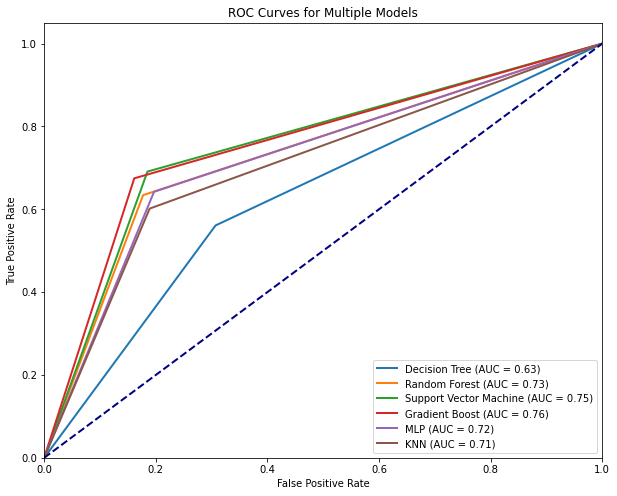

In [48]:
y_true = y_test_mush
y_true[y_true == "user"] = 1
y_true[y_true == "non-user"] = 0
y_true = y_true.astype(int)

y_pred_mush_decision_tree[y_pred_mush_decision_tree == "user"] = 1
y_pred_mush_decision_tree[y_pred_mush_decision_tree == "non-user"] = 0
y_pred_mush_decision_tree = y_pred_mush_decision_tree.astype(int)

y_pred_mush_forest[y_pred_mush_forest == "user"] = 1
y_pred_mush_forest[y_pred_mush_forest == "non-user"] = 0
y_pred_mush_forest = y_pred_mush_forest.astype(int)

y_pred_mush_svm[y_pred_mush_svm == "user"] = 1
y_pred_mush_svm[y_pred_mush_svm == "non-user"] = 0
y_pred_mush_svm = y_pred_mush_svm.astype(int)

y_pred_mush_boost[y_pred_mush_boost == "user"] = 1
y_pred_mush_boost[y_pred_mush_boost == "non-user"] = 0
y_pred_mush_boost = y_pred_mush_boost.astype(int)

y_pred_mush_mlp[y_pred_mush_mlp == "user"] = 1
y_pred_mush_mlp[y_pred_mush_mlp == "non-user"] = 0
y_pred_mush_mlp = y_pred_mush_mlp.astype(int)

y_pred_mush_knn[y_pred_mush_knn == "user"] = 1
y_pred_mush_knn[y_pred_mush_knn == "non-user"] = 0
y_pred_mush_knn = y_pred_mush_knn.astype(int)

y_preds = [
    y_pred_mush_decision_tree,  # Predictions from model 1
    y_pred_mush_forest,  # Predictions from model 2
    y_pred_mush_svm,  # Predictions from model 3
    y_pred_mush_boost,  # Predictions from model 4
    y_pred_mush_mlp,  # Predictions from model 5
    y_pred_mush_knn,  # Predictions from model 6
]
model_names = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'Gradient Boost', 'MLP', 'KNN']
plt.figure(figsize=(10, 8))

for i, y_pred in enumerate(y_preds):
    fpr, tpr, _ = roc_curve(y_true, y_pred, pos_label = 1)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc="lower right")
plt.show()